In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import time
start = time.time()
from sklearn.metrics import classification_report


Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [5]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 51118296 bytes


In [7]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [8]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "train.csv" with length 76775041 bytes


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
x_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
x_test = np.array(test)
input_shape = (28, 28, 1)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)/255

In [0]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.1, stratify=y_train)


In [0]:
# Construct the convolutional neural network model
cnn = Sequential()
cnn.add(Conv2D(28, kernel_size=(3, 3), input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten()) # Flattening the 2D arrays for fully connected layers
cnn.add(Dense(128, activation=tf.nn.relu))
cnn.add(Dropout(0.2))
cnn.add(Dense(10, activation=tf.nn.softmax))
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])



In [18]:
# Apply the early stopping to the model
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = cnn.fit(x=x_train, y=y_train, epochs=20, callbacks=[early_stopping], validation_data=(X_valid, Y_valid))


Train on 42000 samples, validate on 4200 samples
Epoch 1/20
42000/42000 [==============================] - 28s 668us/step - loss: 0.2019 - acc: 0.9387 - val_loss: 0.0841 - val_acc: 0.9776
Epoch 2/20
42000/42000 [==============================] - 28s 669us/step - loss: 0.0946 - acc: 0.9700 - val_loss: 0.0474 - val_acc: 0.9852
Epoch 3/20
42000/42000 [==============================] - 28s 656us/step - loss: 0.0656 - acc: 0.9785 - val_loss: 0.0357 - val_acc: 0.9876
Epoch 4/20
42000/42000 [==============================] - 28s 658us/step - loss: 0.0510 - acc: 0.9830 - val_loss: 0.0223 - val_acc: 0.9931
Epoch 5/20
42000/42000 [==============================] - 28s 673us/step - loss: 0.0416 - acc: 0.9858 - val_loss: 0.0180 - val_acc: 0.9938
Epoch 6/20
42000/42000 [==============================] - 28s 655us/step - loss: 0.0329 - acc: 0.9888 - val_loss: 0.0154 - val_acc: 0.9957
Epoch 7/20
42000/42000 [==============================] - 28s 667us/step - loss: 0.0249 - acc: 0.9917 - val_loss: 0.0

In [0]:
predicted = cnn.predict(x_test)
predicted = np.argmax(predicted, axis = 1)
predicted = pd.Series(predicted, name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predicted],axis = 1)

In [0]:
submission.to_csv("cnn_mnist_datagen.csv",index=False)

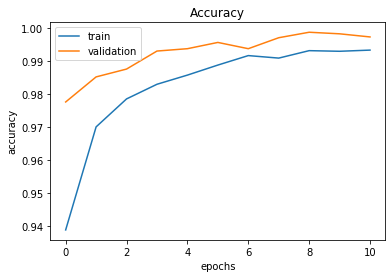

In [23]:
plot_model(cnn, show_shapes=True, show_layer_names=True, to_file='model.png')
# Plot the error rate for training, validation and test for each epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
print(classification_report(Y_valid, np.argmax(cnn.predict(X_valid), axis = 1)))

end = time.time()
print(end - start)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       468
           2       1.00      1.00      1.00       418
           3       1.00      1.00      1.00       435
           4       1.00      1.00      1.00       407
           5       1.00      1.00      1.00       380
           6       1.00      1.00      1.00       414
           7       1.00      0.99      0.99       440
           8       0.99      1.00      1.00       406
           9       0.99      1.00      1.00       419

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200

3935.602874279022
